In [1]:
import os
import ember
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pickle import load
from pickle import dump
import time

In [2]:
data_dir = "../ember2018" #Le dossier contenant les données
#emberdf = ember.read_metadata(data_dir)
X_train, y_train, X_test, y_test = ember.read_vectorized_features(data_dir, feature_version=2) # Création des datasets d'entraînement et de test

In [3]:
#On va supprimer les observations qui ne sont pas labellisées (200K qui sont à visée de semi-supervisé, qu'on ne traitera pas dans le cadre de ce projet)
start = time.time()
train_filter = np.where((y_train==0.) | (y_train==1.))
X_train, y_train = X_train[train_filter], y_train[train_filter]
print(f"Nombre d'observations après suppr des non labellisées : {np.size(X_train,0)}")
end = time.time()
print(f"Temps d'exe de la cellule : {end - start}")

Nombre d'observations après suppr des non labellisées : 600000
Temps d'exe de la cellule : 52.804359436035156


In [4]:
#On scale les données
start = time.time()
with open('scaler.pkl', 'rb') as handle :
    scaler = load(handle)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
end = time.time()
print(f"Temps d'exe de la cellule : {end - start}")

Temps d'exe de la cellule : 68.25601482391357


## Réseau de neurones feed-forward

### Feed-forward à deux couches cachées sigmoïde (taille 128 et 64)

In [6]:
from keras.layers import Dense, Activation
from keras.models import Sequential
ffn = Sequential()

ffn.add(Dense(128,  input_dim=2381, name='fc1'))
ffn.add(Activation('sigmoid'))
ffn.add(Dense(64,  input_dim=128, name='fc2'))
ffn.add(Activation('sigmoid'))
ffn.add(Dense(1,  input_dim=64, name='fc3'))
ffn.add(Activation('sigmoid'))

ffn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
batch_size = 1024
nb_epoch = 100
ffn_history = ffn.fit(X_train_std, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test_std, y_test), verbose=1)

Epoch 1/100
586/586 [==============================] - 20s 31ms/step - loss: 0.2188 - accuracy: 0.9089 - val_loss: 0.2061 - val_accuracy: 0.9198
Epoch 2/100
586/586 [==============================] - 15s 26ms/step - loss: 0.1347 - accuracy: 0.9476 - val_loss: 0.1672 - val_accuracy: 0.9406
Epoch 3/100
586/586 [==============================] - 15s 25ms/step - loss: 0.1051 - accuracy: 0.9598 - val_loss: 0.1784 - val_accuracy: 0.9280
Epoch 4/100
586/586 [==============================] - 15s 25ms/step - loss: 0.0880 - accuracy: 0.9665 - val_loss: 0.1635 - val_accuracy: 0.9412
Epoch 5/100
586/586 [==============================] - 16s 27ms/step - loss: 0.0760 - accuracy: 0.9711 - val_loss: 0.1527 - val_accuracy: 0.9497
Epoch 6/100
586/586 [==============================] - 16s 27ms/step - loss: 0.0672 - accuracy: 0.9746 - val_loss: 0.1613 - val_accuracy: 0.9481
Epoch 7/100
586/586 [==============================] - 15s 25ms/step - loss: 0.0608 - accuracy: 0.9768 - val_loss: 0.1649 - val_ac

In [8]:
# #Sauvegarde du modèle 
# ffn.save('ffn_sigmoid_128_64_adam_scaled')

INFO:tensorflow:Assets written to: ffn_sigmoid_128_64_adam_scaled\assets


In [9]:
# #Sauvegarde de l'history 
# ffn_hist = ffn_history.history
# with open('ffn_sigmoid_128_64_adam_scaled_history.pkl', 'wb') as handle:
#     dump(ffn_history.history, handle)

In [11]:
# #Impport du modèle
# from keras.models import load_model
# ffn = load_model('ffn_tanh_128_64_sgd_scaled')

In [ ]:
# #Import de l'history
# with open('ffn_sigmoid_128_64_adam_scaled_history.pkl', 'rb') as handle:
#     ffn_hist = load(handle)

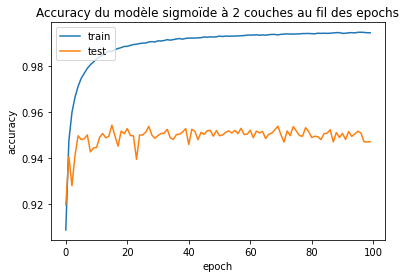

In [10]:
# Plot de l'accuracy au fil des epochs
plt.plot(ffn_hist['accuracy'])
plt.plot(ffn_hist['val_accuracy'])
plt.title('Accuracy du modèle sigmoïde à 2 couches au fil des epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

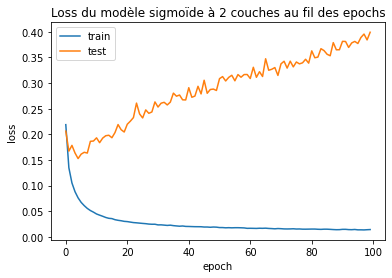

In [11]:
# Plot de la loss au fil des epochs
plt.plot(ffn_hist['loss'])
plt.plot(ffn_hist['val_loss'])
plt.title('Loss du modèle sigmoïde à 2 couches au fil des epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test du même modèle avec un batch size de 32...

In [12]:
batch_size = 32
nb_epoch = 100
# convert class vectors to binary class matrices
ffn_history_32 = ffn.fit(X_train_std, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test_std, y_test), verbose=1)

Epoch 1/100
18750/18750 [==============================] - 63s 3ms/step - loss: 0.0599 - accuracy: 0.9763 - val_loss: 0.1898 - val_accuracy: 0.9437
Epoch 2/100
18750/18750 [==============================] - 61s 3ms/step - loss: 0.0530 - accuracy: 0.9791 - val_loss: 0.2044 - val_accuracy: 0.9370
Epoch 3/100
18750/18750 [==============================] - 61s 3ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 0.1929 - val_accuracy: 0.9433
Epoch 4/100
18750/18750 [==============================] - 67s 4ms/step - loss: 0.0476 - accuracy: 0.9810 - val_loss: 0.2012 - val_accuracy: 0.9427
Epoch 5/100
18750/18750 [==============================] - 93s 5ms/step - loss: 0.0455 - accuracy: 0.9820 - val_loss: 0.2046 - val_accuracy: 0.9445
Epoch 6/100
18750/18750 [==============================] - 91s 5ms/step - loss: 0.0441 - accuracy: 0.9826 - val_loss: 0.1916 - val_accuracy: 0.9505
Epoch 7/100
18750/18750 [==============================] - 97s 5ms/step - loss: 0.0428 - accuracy: 0.9829 - val_

In [13]:
# #Sauvegarde du modèle 
# ffn.save('ffn_sigmoid_128_64_adam_scaled_32')

# #Commenté pour éviter les bêtises

INFO:tensorflow:Assets written to: ffn_sigmoid_128_64_adam_scaled_32\assets


In [15]:
# #Sauvegarde de l'history
# ffn_hist32 = ffn_history_32.history
# with open('ffn_sigmoid_128_64_adam_scaled_history_32.pkl', 'wb') as handle:
#         dump(ffn_hist, handle)
# #Sauvegarde du modèle 

In [ ]:
# #Impport du modèle
# from keras.models import load_model
# ffn_32 = load_model('ffn_tanh_128_64_sgd_scaled')

In [ ]:
# #Import de l'history
# with open('ffn_sigmoid_128_64_adam_scaled_history_32.pkl', 'rb') as handle:
#     ffn_hist32 = load(handle)

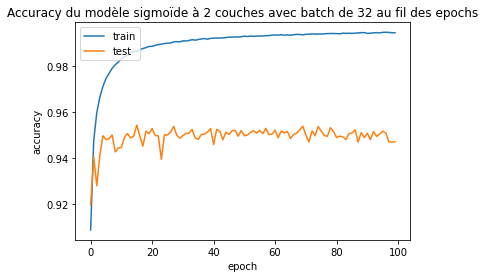

In [16]:
# Plot de l'accuracy au fil des epochs
plt.plot(ffn_hist['accuracy'])
plt.plot(ffn_hist['val_accuracy'])
plt.title('Accuracy du modèle sigmoïde à 2 couches avec batch de 32 au fil des epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

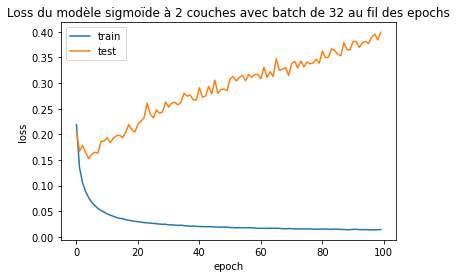

In [17]:
# Plot de la loss au fil des epochs
plt.plot(ffn_hist['loss'])
plt.plot(ffn_hist['val_loss'])
plt.title('Loss du modèle sigmoïde à 2 couches avec batch de 32 au fil des epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Feed-forward à trois couches cachées sigmoïde (taille 256, 128 et 64)

In [10]:
from keras.layers import Dense, Activation
from keras.models import Sequential
ffn2 = Sequential()

ffn2.add(Dense(256,  input_dim=2381, name='fc1'))
ffn2.add(Activation('sigmoid'))
ffn2.add(Dense(128,  input_dim=256, name='fc2'))
ffn2.add(Activation('sigmoid'))
ffn2.add(Dense(64,  input_dim=128, name='fc3'))
ffn2.add(Activation('sigmoid'))
ffn2.add(Dense(1,  input_dim=64, name='fc4'))
ffn2.add(Activation('sigmoid'))

ffn2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
batch_size = 1024
nb_epoch = 100
ffn2_history = ffn2.fit(X_train_std, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test_std, y_test), verbose=1)

Epoch 1/100
586/586 [==============================] - 20s 34ms/step - loss: 0.2223 - accuracy: 0.9082 - val_loss: 0.1942 - val_accuracy: 0.9234
Epoch 2/100
586/586 [==============================] - 21s 35ms/step - loss: 0.1263 - accuracy: 0.9515 - val_loss: 0.1821 - val_accuracy: 0.9294
Epoch 3/100
586/586 [==============================] - 20s 35ms/step - loss: 0.0981 - accuracy: 0.9630 - val_loss: 0.1768 - val_accuracy: 0.9366
Epoch 4/100
586/586 [==============================] - 20s 34ms/step - loss: 0.0824 - accuracy: 0.9689 - val_loss: 0.1576 - val_accuracy: 0.9456
Epoch 5/100
586/586 [==============================] - 20s 34ms/step - loss: 0.0708 - accuracy: 0.9734 - val_loss: 0.1559 - val_accuracy: 0.9486
Epoch 6/100
586/586 [==============================] - 20s 34ms/step - loss: 0.0629 - accuracy: 0.9765 - val_loss: 0.1627 - val_accuracy: 0.9460
Epoch 7/100
586/586 [==============================] - 20s 34ms/step - loss: 0.0571 - accuracy: 0.9786 - val_loss: 0.1609 - val_ac

In [12]:
# #Sauvegarde du modèle 
# ffn2.save('ffn_sigmoid_256_128_64_adam_scaled')

# #Commenté pour éviter les bêtises

INFO:tensorflow:Assets written to: ffn_sigmoid_256_128_64_adam_scaled\assets


In [44]:
# #Sauvegarde de l'history 
# ffn2_hist = ffn2_history.history
# with open('ffn_sigmoid_256_128_64_adam_scaled_history.pkl', 'wb') as handle:
#     dump(ffn2_hist, handle)

In [ ]:
# #Impport du modèle
# from keras.models import load_model
# ffn2 = load_model('ffn_sigmoid_256_128_64_adam_scaled')

In [ ]:
# #Import de l'history
# with open('ffn_sigmoid_256_128_64_adam_scaled_history.pkl', 'rb') as handle:
#     ffn2_hist = load(handle)

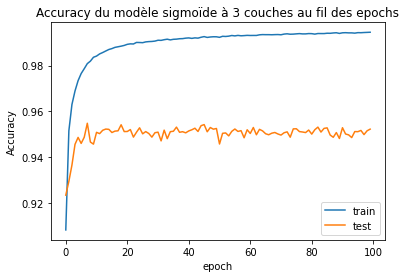

In [45]:
# Plot de l'accuracy au fil des epochs
plt.plot(ffn2_hist['accuracy'])
plt.plot(ffn2_hist['val_accuracy'])
plt.title('Accuracy du modèle sigmoïde à 3 couches au fil des epochs')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

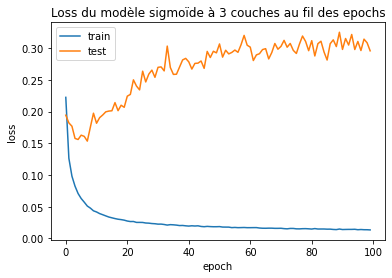

In [46]:
# Plot de la loss au fil des epochs
plt.plot(ffn2_hist['loss'])
plt.plot(ffn2_hist['val_loss'])
plt.title('Loss du modèle sigmoïde à 3 couches au fil des epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Feed-forward à trois couches cachées tanh (taille 256, 128 et 64)

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential
ffn3 = Sequential()

ffn3.add(Dense(256,  input_dim=2381, name='fc1'))
ffn3.add(Activation('tanh'))
ffn3.add(Dense(128,  input_dim=256, name='fc2'))
ffn3.add(Activation('tanh'))
ffn3.add(Dense(64,  input_dim=128, name='fc3'))
ffn3.add(Activation('tanh'))
ffn3.add(Dense(1,  input_dim=64, name='fc4'))
ffn3.add(Activation('sigmoid'))

ffn3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
batch_size = 1024
nb_epoch = 100
ffn3_history = ffn3.fit(X_train_std, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test_std, y_test), verbose=1)

Epoch 1/100
586/586 [==============================] - 20s 33ms/step - loss: 0.1633 - accuracy: 0.9326 - val_loss: 0.1790 - val_accuracy: 0.9281
Epoch 2/100
586/586 [==============================] - 20s 33ms/step - loss: 0.1010 - accuracy: 0.9601 - val_loss: 0.1669 - val_accuracy: 0.9388
Epoch 3/100
586/586 [==============================] - 19s 33ms/step - loss: 0.0802 - accuracy: 0.9684 - val_loss: 0.1564 - val_accuracy: 0.9416
Epoch 4/100
586/586 [==============================] - 19s 33ms/step - loss: 0.0670 - accuracy: 0.9736 - val_loss: 0.1528 - val_accuracy: 0.9491
Epoch 5/100
586/586 [==============================] - 19s 33ms/step - loss: 0.0591 - accuracy: 0.9767 - val_loss: 0.1547 - val_accuracy: 0.9494
Epoch 6/100
586/586 [==============================] - 19s 33ms/step - loss: 0.0530 - accuracy: 0.9792 - val_loss: 0.1521 - val_accuracy: 0.9524
Epoch 7/100
586/586 [==============================] - 19s 33ms/step - loss: 0.0489 - accuracy: 0.9805 - val_loss: 0.1792 - val_ac

In [20]:
# #Sauvegarde du modèle 
# ffn3.save('ffn_tanh_256_128_64_adam_scaled')

# #Commenté pour éviter les bêtises

INFO:tensorflow:Assets written to: ffn_tanh_256_128_64_adam_scaled\assets


In [47]:
# #Sauvegarde de l'history 
# ffn3_hist = ffn3_history.history
# with open('ffn_tanh_256_128_64_adam_scaled_history.pkl', 'wb') as handle:
#     dump(ffn3_hist, handle)

In [ ]:
# #Impport du modèle
# from keras.models import load_model
# ffn3 = load_model('ffn_tanh_256_128_64_adam_scaled')

In [ ]:
# #Import de l'history
# with open('ffn_tanh_256_128_64_adam_scaled_history.pkl', 'rb') as handle:
#     ffn3_hist = load(handle)

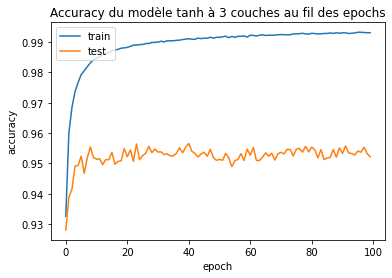

In [48]:
# Plot de l'accuracy au fil des epochs
plt.plot(ffn3_hist['accuracy'])
plt.plot(ffn3_hist['val_accuracy'])
plt.title('Accuracy du modèle tanh à 3 couches au fil des epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

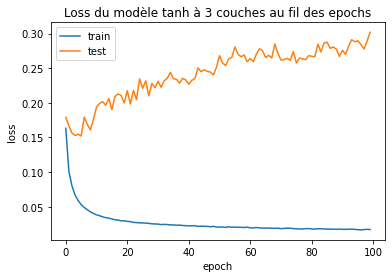

In [49]:
# Plot de la loss au fil des epochs
plt.plot(ffn3_hist['loss'])
plt.plot(ffn3_hist['val_loss'])
plt.title('Loss du modèle tanh à 3 couches au fil des epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Approche Convolution CNN

In [35]:
### Approche Convolution CNN
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten
from keras.models import Sequential

cnn = Sequential()
cnn.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(2381,1), name='conv1'))
cnn.add(MaxPool1D(pool_size=2, name='pool1'))
cnn.add(Conv1D(64, kernel_size=3, activation='relu', name='conv2'))
cnn.add(MaxPool1D(pool_size=2, name='pool2'))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'], )

In [36]:
batch_size = 1024
nb_epoch = 20
cnn_history = cnn.fit(X_train_std, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test_std, y_test), verbose=1)

Epoch 1/20
586/586 [==============================] - 2948s 5s/step - loss: 0.2428 - accuracy: 0.9011 - val_loss: 0.3562 - val_accuracy: 0.9122
Epoch 2/20
586/586 [==============================] - 2947s 5s/step - loss: 0.1704 - accuracy: 0.9328 - val_loss: 0.3385 - val_accuracy: 0.9155
Epoch 3/20
586/586 [==============================] - 2943s 5s/step - loss: 0.1478 - accuracy: 0.9420 - val_loss: 0.2764 - val_accuracy: 0.9308
Epoch 4/20
586/586 [==============================] - 2995s 5s/step - loss: 0.1362 - accuracy: 0.9468 - val_loss: 0.2515 - val_accuracy: 0.9349
Epoch 5/20
586/586 [==============================] - 3062s 5s/step - loss: 0.1286 - accuracy: 0.9499 - val_loss: 0.2920 - val_accuracy: 0.9321
Epoch 6/20
586/586 [==============================] - 3106s 5s/step - loss: 0.1201 - accuracy: 0.9533 - val_loss: 0.2368 - val_accuracy: 0.9352
Epoch 7/20
586/586 [==============================] - 3111s 5s/step - loss: 0.1160 - accuracy: 0.9551 - val_loss: 0.1975 - val_accuracy:

In [13]:
score = cnn.evaluate(X_test_std, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.4040070176124573
Test accuracy: 0.8780750036239624


In [38]:
# #Sauvegarde du modèle 
# cnn.save('cnn_relu_128_64_adam_scaled')

# #Commenté pour éviter les bêtises

INFO:tensorflow:Assets written to: cnn_relu_128_64_adam_scaled\assets


INFO:tensorflow:Assets written to: cnn_relu_128_64_adam_scaled\assets


In [41]:
# #Sauvegarde de l'history 
# cnn_hist = cnn_history.history
# with open('cnn_relu_128_64_adam_scaled_history.pkl', 'wb') as handle:
#     dump(cnn_hist, handle)

In [ ]:
# #Impport du modèle
# cnn = keras.models.load_model('cnn_relu_128_64_adam_scaled')

In [ ]:
# #Import de l'history
# with open('cnn_relu_128_64_adam_scaled_history.pkl', 'rb') as handle:
#     cnn_hist = load(handle)

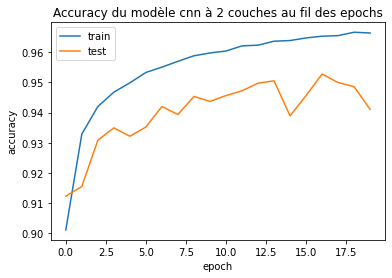

In [42]:
# Plot de l'accuracy au fil des epochs
plt.plot(cnn_hist['accuracy'])
plt.plot(cnn_hist['val_accuracy'])
plt.title('Accuracy du modèle cnn à 2 couches au fil des epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

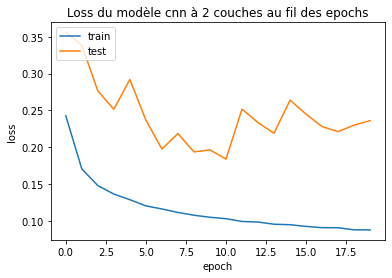

In [43]:
# Plot de la loss au fil des epochs
plt.plot(cnn_hist['loss'])
plt.plot(cnn_hist['val_loss'])
plt.title('Loss du modèle cnn à 2 couches au fil des epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Comparaison des modèles deep learning

In [50]:
# Probas de prédiction et seuils
from sklearn.metrics import roc_curve

import time
start = time.time()

y_pred_ffn1 = ffn.predict(X_test_std).ravel()
fpr_ffn1, tpr_ffn1, thresholds_ffn1 = roc_curve(y_test, y_pred_ffn1)

y_pred_ffn2 = ffn2.predict(X_test_std).ravel()
fpr_ffn2, tpr_ffn2, thresholds_ffn2 = roc_curve(y_test, y_pred_ffn2)

y_pred_ffn3 = ffn3.predict(X_test_std).ravel()
fpr_ffn3, tpr_ffn3, thresholds_ffn3 = roc_curve(y_test, y_pred_ffn3)

y_pred_cnn = cnn.predict(X_test_std).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

end = time.time()
print(f"Temps d'exe de la cellule : {end - start}")

6250/6250 [==============================] - 276s 44ms/step
Temps d'exe de la cellule : 310.492867231369


### Matrices de confusion

In [51]:
from sklearn.metrics import confusion_matrix

y_decision_ffn1 = [1 if x > 0.5 else 0 for x in y_pred_ffn1] 
y_decision_ffn2 = [1 if x > 0.5 else 0 for x in y_pred_ffn2]
y_decision_ffn3 = [1 if x > 0.5 else 0 for x in y_pred_ffn3] 
y_decision_cnn = [1 if x > 0.5 else 0 for x in y_pred_cnn] 

#### Modèle ffn sigmoïde 2 couches
cf_matrix = confusion_matrix(y_test, y_decision_ffn1)
vn, fp, fn, vp = cf_matrix.ravel()
print("###########################################################")
print("Pour modèle ffn sigmoïde 2 couches :")
print(f"Matrice de confusion : {cf_matrix/np.sum(cf_matrix)}")
print(f"Sensibilité : {vp/(vp+fn)}")
print(f"Spécificité : {vn/(vn+fp)}")
print(f"Valeur prédictive positive : {vp/(vp+fp)}")
print(f"Valeur prédictive négative : {vn/(vn+fn)}")
print(f"Taux de faux positifs (1-spécificité) : {fp/(vn+fp)}")
print(f"Taux de faux négatifs (1-sensbilité) : {fn/(vp+fn)}")

print(f"Taux de précision : {(cf_matrix[0][0]+cf_matrix[1][1])/np.sum(cf_matrix)}")
print("###########################################################\n\n")

#### Modèle ffn sigmoïde 3 couches
cf_matrix = confusion_matrix(y_test, y_decision_ffn2)
vn, fp, fn, vp = cf_matrix.ravel()
print("###########################################################")
print("Pour modèle ffn sigmoïde 3 couches :")
print(f"Matrice de confusion : {cf_matrix/np.sum(cf_matrix)}")
print(f"Sensibilité : {vp/(vp+fn)}")
print(f"Spécificité : {vn/(vn+fp)}")
print(f"Valeur prédictive positive : {vp/(vp+fp)}")
print(f"Valeur prédictive négative : {vn/(vn+fn)}")
print(f"Taux de faux positifs (1-spécificité) : {fp/(vn+fp)}")
print(f"Taux de faux négatifs (1-sensbilité) : {fn/(vp+fn)}")

print(f"Taux de précision : {(cf_matrix[0][0]+cf_matrix[1][1])/np.sum(cf_matrix)}")
print("###########################################################\n\n")

#### Modèle ffn tanh 3 couches
cf_matrix = confusion_matrix(y_test, y_decision_ffn3)
vn, fp, fn, vp = cf_matrix.ravel()
print("###########################################################")
print("Pour modèle ffn tanh 3 couches :")
print(f"Matrice de confusion : {cf_matrix/np.sum(cf_matrix)}")
print(f"Sensibilité : {vp/(vp+fn)}")
print(f"Spécificité : {vn/(vn+fp)}")
print(f"Valeur prédictive positive : {vp/(vp+fp)}")
print(f"Valeur prédictive négative : {vn/(vn+fn)}")
print(f"Taux de faux positifs (1-spécificité) : {fp/(vn+fp)}")
print(f"Taux de faux négatifs (1-sensbilité) : {fn/(vp+fn)}")

print(f"Taux de précision : {(cf_matrix[0][0]+cf_matrix[1][1])/np.sum(cf_matrix)}")
print("###########################################################\n\n")

#### Modèle cnn relu 2 couches
cf_matrix = confusion_matrix(y_test, y_decision_cnn)
vn, fp, fn, vp = cf_matrix.ravel()
print("###########################################################")
print("Pour modèle cnn relu 2 couches :")
print(f"Matrice de confusion : {cf_matrix/np.sum(cf_matrix)}")
print(f"Sensibilité : {vp/(vp+fn)}")
print(f"Spécificité : {vn/(vn+fp)}")
print(f"Valeur prédictive positive : {vp/(vp+fp)}")
print(f"Valeur prédictive négative : {vn/(vn+fn)}")
print(f"Taux de faux positifs (1-spécificité) : {fp/(vn+fp)}")
print(f"Taux de faux négatifs (1-sensbilité) : {fn/(vp+fn)}")

print(f"Taux de précision : {(cf_matrix[0][0]+cf_matrix[1][1])/np.sum(cf_matrix)}")
print("###########################################################\n\n")

# Lecture matrice de confusion : 
# Vrai négatif, Faux positif
# Faux négatif, Vrai positif


###########################################################
Pour modèle ffn sigmoïde 2 couches :
Matrice de confusion : [[0.475425 0.024575]
 [0.02635  0.47365 ]]
Sensibilité : 0.9473
Spécificité : 0.95085
Valeur prédictive positive : 0.9506748958803753
Valeur prédictive négative : 0.9474864231976483
Taux de faux positifs (1-spécificité) : 0.04915
Taux de faux négatifs (1-sensbilité) : 0.0527
Taux de précision : 0.949075
###########################################################


###########################################################
Pour modèle ffn sigmoïde 3 couches :
Matrice de confusion : [[0.479735 0.020265]
 [0.02749  0.47251 ]]
Sensibilité : 0.94502
Spécificité : 0.95947
Valeur prédictive positive : 0.9588757546547613
Valeur prédictive négative : 0.9458031445610923
Taux de faux positifs (1-spécificité) : 0.04053
Taux de faux négatifs (1-sensbilité) : 0.05498
Taux de précision : 0.952245
###########################################################


########################

### Courbes ROC et AUC des modèles

In [52]:
#Calcul des AUC
from sklearn.metrics import auc
auc_ffn1 = auc(fpr_ffn1, tpr_ffn1)
auc_ffn2 = auc(fpr_ffn2, tpr_ffn2)
auc_ffn3 = auc(fpr_ffn3, tpr_ffn3)
auc_cnn = auc(fpr_cnn, tpr_cnn)

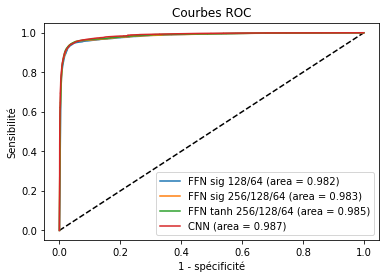

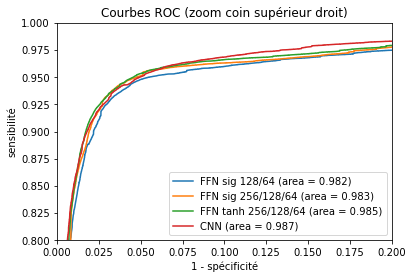

In [53]:
# Tracé des courbes ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ffn1, tpr_ffn1, label='FFN sig 128/64 (area = {:.3f})'.format(auc_ffn1))
plt.plot(fpr_ffn2, tpr_ffn2, label='FFN sig 256/128/64 (area = {:.3f})'.format(auc_ffn2))
plt.plot(fpr_ffn3, tpr_ffn3, label='FFN tanh 256/128/64 (area = {:.3f})'.format(auc_ffn3))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('1 - spécificité')
plt.ylabel('Sensibilité')
plt.title('Courbes ROC')
plt.legend(loc='best')
plt.show()
# Zoom coin supérieur gauche
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ffn1, tpr_ffn1, label='FFN sig 128/64 (area = {:.3f})'.format(auc_ffn1))
plt.plot(fpr_ffn2, tpr_ffn2, label='FFN sig 256/128/64 (area = {:.3f})'.format(auc_ffn2))
plt.plot(fpr_ffn3, tpr_ffn3, label='FFN tanh 256/128/64 (area = {:.3f})'.format(auc_ffn3))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('1 - spécificité')
plt.ylabel('sensibilité')
plt.title('Courbes ROC (zoom coin supérieur droit)')
plt.legend(loc='best')
plt.show()

## Comparaison entre Deep Learning et approches linéaires

In [22]:
import os
import ember
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from pickle import load
from pickle import dump
from joblib import parallel_backend
import time

In [25]:
#Importer les modèles depuis les dump pickles ou les save keras
start = time.time()
    
with open('forest_clf.pkl', 'rb') as handle :
    forest_clf = load(handle)
    
with open('forest_plus_clf.pkl', 'rb') as handle :
    forest_plus_clf = load(handle)

ffn3 = load_model('ffn_tanh_256_128_64_adam_scaled')

cnn = load_model('cnn_relu_128_64_adam_scaled')
    
end = time.time()
print(f"Temps d'exe de la cellule : {end - start}")

Temps d'exe de la cellule : 5.136062383651733


In [26]:
#Probas de prédiction à partir des modèles

start = time.time()

with parallel_backend('threading', n_jobs=4):
    y_pred_forest = forest_clf.predict_proba(X_test)
    y_pred_forestplus = forest_plus_clf.predict_proba(X_test)
y_pred_ffn3 = ffn3.predict(X_test_std).ravel()
y_pred_cnn = cnn.predict(X_test_std).ravel()
    

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_pred_forest[:,1])
fpr_forestplus, tpr_forestplus, thresholds_forestplus = roc_curve(y_test, y_pred_forestplus[:,1])
fpr_ffn3, tpr_ffn3, thresholds_ffn3 = roc_curve(y_test, y_pred_ffn3)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

end = time.time()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   16.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   14.4s finished


6250/6250 [==============================] - 327s 52ms/step


In [27]:
#Calcul des AUC
from sklearn.metrics import auc
auc_forest = auc(fpr_forest, tpr_forest)
auc_forestplus = auc(fpr_forestplus, tpr_forestplus)
auc_ffn3 = auc(fpr_ffn3, tpr_ffn3)
auc_cnn = auc(fpr_cnn, tpr_cnn)

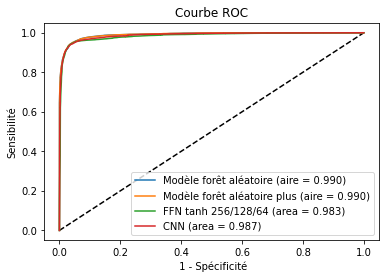

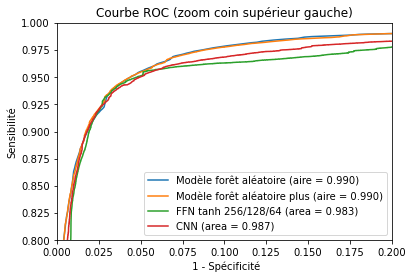

In [30]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Modèle forêt aléatoire (aire = {:.3f})'.format(auc_forest))
plt.plot(fpr_forestplus, tpr_forestplus, label='Modèle forêt aléatoire plus (aire = {:.3f})'.format(auc_forestplus))
plt.plot(fpr_ffn3, tpr_ffn3, label='FFN tanh 256/128/64 (area = {:.3f})'.format(auc_ffn3))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel(' 1 - Spécificité')
plt.ylabel('Sensibilité')
plt.title('Courbe ROC')
plt.legend(loc='best')
plt.show()
# Zoom sur le coin gauche supérieur
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Modèle forêt aléatoire (aire = {:.3f})'.format(auc_forest))
plt.plot(fpr_forestplus, tpr_forestplus, label='Modèle forêt aléatoire plus (aire = {:.3f})'.format(auc_forestplus))
plt.plot(fpr_ffn3, tpr_ffn3, label='FFN tanh 256/128/64 (area = {:.3f})'.format(auc_ffn3))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel(' 1 - Spécificité')
plt.ylabel('Sensibilité')
plt.title('Courbe ROC (zoom coin supérieur gauche)')
plt.legend(loc='best')
plt.show()

In [61]:
import numpy as np
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

print(f"Taux de précision forêt aléatoire pour FPR de 0.1 % : {tpr_forest[find_nearest(fpr_forest,0.001)]}")
print(f"Taux de précision forêt aléatoire plus pour FPR de 0.1 % : {tpr_forestplus[find_nearest(fpr_forestplus,0.001)]}")
print(f"Taux de précision FFN 3 couches tanh pour FPR de 0.1 % : {tpr_ffn3[find_nearest(fpr_ffn3,0.001)]}")
print(f"Taux de précision CNN pour FPR de 0.1 % : {tpr_cnn[find_nearest(fpr_cnn,0.001)]}")
print("###########################################################")
print(f"Taux de précision forêt aléatoire pour FPR de 1 % : {tpr_forest[find_nearest(fpr_forest,0.01)]}")
print(f"Taux de précision forêt aléatoire plus pour FPR de 1 % : {tpr_forestplus[find_nearest(fpr_forestplus,0.01)]}")
print(f"Taux de précision FFN 3 couches tanh pour FPR de 1 % : {tpr_ffn3[find_nearest(fpr_ffn3,0.01)]}")
print(f"Taux de précision CNN pour FPR de 1 % : {tpr_cnn[find_nearest(fpr_cnn,0.01)]}")

Taux de précision forêt aléatoire pour FPR de 0.1 % : 0.69774
Taux de précision forêt aléatoire plus pour FPR de 0.1 % : 0.69633
Taux de précision FFN 3 couches tanh pour FPR de 0.1 % : 0.26928
Taux de précision CNN pour FPR de 0.1 % : 0.44132
###########################################################
Taux de précision forêt aléatoire pour FPR de 1 % : 0.86355
Taux de précision forêt aléatoire plus pour FPR de 1 % : 0.85907
Taux de précision FFN 3 couches tanh pour FPR de 1 % : 0.84257
Taux de précision CNN pour FPR de 1 % : 0.84998
